In [2]:
%%time
import json
import numpy
import pandas as pd

#西北 41.432005, -8.7862463 东北 41.432005, -8.2596807
#东南 40.91674, -8.7862463 西南 40.91674, -8.2596807 
# 40.91674,-8.2596807
Corners = [[-8.7862463,40.91674],[-8.2596807,40.91674],[-8.2596807,41.432005],[-8.7862463,41.432005,]]

class DataPreparation:
    def __init__(self, data_file, grid_size=1e4):
        self.Data = pd.read_csv(data_file)
        self.Data_after_filter = self.Data
        self.path_diff = []
        self.lat_set = set()
        self.lon_set = set()
        self.min_lat = 40.91674
        self.min_lon = -8.7862463
        self.max_lat = 41.432005
        self.max_lon = -8.2596807
    
    def position_filter(self, pos):
        if self.min_lat<=pos[1]<=self.max_lat and self.min_lon<=pos[0]<=self.max_lon:
            return True
        else:
            return False
    
    def judge(self, item):
        pos_lis = item['POLYLINE'] #'POLYLINE'
        pos_lis = json.loads(pos_lis)
        for pos in pos_lis:
            if not self.position_filter(pos):
                self.path_diff.append(item)
#                 self.Data_after_filter.drop(index=item['TRIP_ID'], inplace=True)
        
    def trajectory_filter(self):
        df = self.Data[['TRIP_ID','POLYLINE']]
        i = 1
        for _index, item in df.iterrows():
            pos_lis = item['POLYLINE'] #'POLYLINE'
            pos_lis = json.loads(pos_lis)
            if i%1000==0:
                print(i)
            i += 1
            for pos in pos_lis:
                if not self.position_filter(pos):
                    self.path_diff.append(item)
                    self.Data_after_filter.drop(index=_index, inplace=True)
                    break

    def get_max_or_min(self, data_set, isMax=True):
            return max(data_set) if isMax else min(data_set)


DataFile = '~/Desktop/train.csv'
data_prase = DataPreparation(DataFile, grid_size=1e4)
data_prase.trajectory_filter()

print('范围较大的轨迹数量：', len(data_prase.path_diff))
print("过滤后的轨迹数量：", len(data_prase.Data))
data_prase.Data_after_filter.to_csv('~/Desktop/train_after_filter.csv', index=False)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

1164000
1165000
1166000
1167000
1168000
1169000
1170000
1171000
1172000
1173000
1174000
1175000
1176000
1177000
1178000
1179000
1180000
1181000
1182000
1183000
1184000
1185000
1186000
1187000
1188000
1189000
1190000
1191000
1192000
1193000
1194000
1195000
1196000
1197000
1198000
1199000
1200000
1201000
1202000
1203000
1204000
1205000
1206000
1207000
1208000
1209000
1210000
1211000
1212000
1213000
1214000
1215000
1216000
1217000
1218000
1219000
1220000
1221000
1222000
1223000
1224000
1225000
1226000
1227000
1228000
1229000
1230000
1231000
1232000
1233000
1234000
1235000
1236000
1237000
1238000
1239000
1240000
1241000
1242000
1243000
1244000
1245000
1246000
1247000
1248000
1249000
1250000
1251000
1252000
1253000
1254000
1255000
1256000
1257000
1258000
1259000
1260000
1261000
1262000
1263000
1264000
1265000
1266000
1267000
1268000
1269000
1270000
1271000
1272000
1273000
1274000
1275000
1276000
1277000
1278000
1279000
1280000
1281000
1282000
1283000
1284000
1285000
1286000
1287000
1288000


### 生成网格 保存网格边界

In [56]:
# self.min_lat = 40.91674
# self.min_lon = -8.7862463
# self.max_lat = 41.432005
# self.max_lon = -8.2596807
import json
X_Cell = 45; Y_Cell = 60
def generate_lis(start, end, step):
    tmp = []
#     print(step)
    while start <= end:
        tmp.append(start)
        start += step
    return tmp 

def generate_xy_axis(min_x, min_y, max_x, max_y):
    
    axis_x = generate_lis(min_x, max_x, (max_x-min_x)/(X_Cell+1))
    axis_y = generate_lis(min_y, max_y, (max_y-min_y)/(Y_Cell+1))
    return axis_x, axis_y

# 返回第一个大于num的数组下标
def lower_bound(lis, num):
    low, high = 0, len(lis)-1
    while low < high:
        mid = (low+high)//2
        if lis[mid]<=num:
            low = mid + 1
        else:
            high = mid
    return high if high >0 else 1

# 得到坐标轴
axis_x, axis_y = generate_xy_axis(-8.7862463, 40.91674, -8.2596807, 41.432005)
def get_tag(pos, axis_x=axis_x, axis_y=axis_y):
    lower_lng = lower_bound(axis_x, pos[0])
    lower_lat = lower_bound(axis_y, pos[1])
    return (lower_lat-1)*X_Cell+lower_lng

print(get_tag([-8.2596807, 41.432005]))
print(get_tag([-8.7862463, 40.91674]))
## 生成网格线
grids_h = []
grids_v = []
for i in range(len(axis_y)):
    tmp = [[axis_x[0],axis_y[i]], [axis_x[-1],axis_y[i]]]
    grids_h.append(tmp)
for i in range(len(axis_x)):
    tmp = [[axis_x[i],axis_y[0]], [axis_x[i],axis_y[-1]]]
    grids_v.append(tmp)
# print(grids_v)

2700
1


In [5]:
# 轨迹数据 转化为数字标签（one-hot编码前一步）
# %%time
import pandas as pd
import json
tra_data = pd.read_csv('~/Desktop/train_after_filter.csv')

def transfer(pos_lis):
    result = []
    pos_lis = json.loads(pos_lis)
    result = [get_tag(x) for x in pos_lis]
    return str(result)

tra_data['POLYLINE_TAG'] = tra_data['POLYLINE'].apply(transfer)
# tra_data['POLYLINE_TAG'] = tra_data['POLYLINE_TAG'].apply(lambda x:str(x))
# tra_data.to_csv('~/Desktop/train_after_filter_tag.csv', index=False)

In [6]:
print((json.loads(tra_data['POLYLINE_TAG'][2])))

[1186, 1186, 1186, 1185, 1185, 1185, 1185, 1185, 1185, 1185, 1184, 1229, 1229, 1229, 1229, 1229, 1229, 1229, 1229, 1229, 1229, 1229, 1228, 1273, 1273, 1273, 1273, 1273, 1272, 1272, 1272, 1272, 1272, 1272, 1187, 1187, 1272, 1272, 1272, 1272, 1227, 1227, 1227, 1227, 1227, 1227, 1228, 1228, 1228, 1228, 1228, 1228, 1228, 1228, 1229, 1229, 1229, 1229, 1184, 1184, 1185, 1185, 1185, 1185, 1185]


[1234, 1233, 1233, 1233, 1233, 1233, 1233, 1233, 1233, 1233, 1232, 1232, 1232, 1232, 1232, 1232, 1232, 1232, 1232, 1232, 1232, 1232, 1232, 1231, 1231, 1231, 1231, 1231, 1186, 1186, 1186, 1187, 1186, 1186, 1186, 1186]
[[16, 29], [16, 29], [16, 29], [16, 29], [16, 30], [16, 30], [16, 30], [16, 30], [16, 30], [16, 30], [16, 30], [16, 31], [16, 31], [16, 31], [16, 31], [16, 31], [16, 31], [16, 31], [16, 31], [16, 31], [16, 31], [15, 31], [15, 31], [15, 31], [15, 31], [14, 31], [14, 31], [14, 31], [14, 31], [14, 31], [14, 31], [14, 31], [13, 30], [13, 30], [13, 30], [13, 30], [13, 30], [13, 31], [13, 31], [13, 31], [13, 31], [13, 31], [13, 31], [13, 31], [13, 31], [13, 31], [13, 31]]


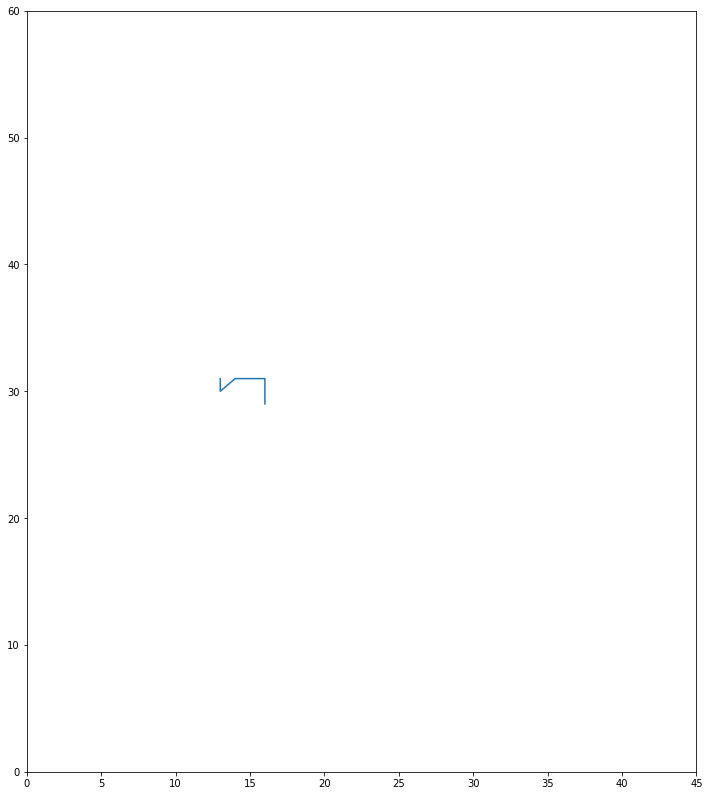

In [67]:
pos_show = json.loads(tra_data['POLYLINE'][6])
# print(pos_show)
print((json.loads(tra_data['POLYLINE_TAG'][6])))

# one-hot转网格坐标
def pos_split(pos_tag):
    pos_lis = json.loads(pos_tag)
    x, y, result = [],[],[]
    for pos in pos_lis:
        #注意每行最后一个的坐标表示
        x.append(pos%(X_Cell) if pos%(X_Cell)!=0 else X_Cell) 
        y.append(pos//(X_Cell)+1 if pos%(X_Cell)!=0 else pos//(X_Cell))
#         result.append([pos%X_Cell,pos//X_Cell])
    result = [[x[i], y[i]] for i in range(len(x))]
    return x, y, result
xs, ys, show_pic_locs = pos_split(tra_data['POLYLINE_TAG'][9874])

# 编码后轨迹展示
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(12, 14))
plt.axis([0, X_Cell, 0, Y_Cell])
plt.plot(xs,ys)
print(show_pic_locs)
plt.show()

In [2]:
%%time
# 提取起点-终点列表
import json
result = []
pos = data['POLYLINE']

def add_pos_set(item):
    global result
    tmp = json.loads(item)
    if len(tmp) == 0:
        return 
    start_tmp, end_tmp = tmp[0], tmp[-1]
    result.append(start_tmp)
    result.append(end_tmp)

pos.apply(lambda x : add_pos_set(x))

Wall time: 45 s


In [4]:
import json
# str_result = str(result)
# FileObject = open('start_end_positions.txt', 'w')
# FileObject.write(str_result)
# FileObject.close()

positions = open('start_end_positions.txt', 'r')
lis_pos = positions.readlines()
positions = json.loads(lis_pos[0])
print(len(positions))

1
3407708


In [6]:
set_pos = set()
for pos in positions:
    set_pos.add(str(pos))
print(len(set_pos))

1853752


In [11]:
lis_pos = list(set_pos)
for i in range(len(lis_pos)):
    lis_pos[i] = json.loads(lis_pos[i])
print(type(lis_pos[0][0]))
str_result = str(lis_pos)
FileObject = open('start_end_positions_after_dedup.txt', 'w')
FileObject.write(str_result)
FileObject.close()

<class 'float'>


In [24]:
dic = {'min_lat': 40.000041, 'max_lat': 41.99994, 'min_lon': -8.897364, 'max_lon': -8.000001}
lats = [40.000041,41.99994]
lons = [-8.897364,-8.000001]
Global_Area = []
for i in lats:
    for j in lons:
        tmp = [j, i]
        Global_Area.append(tmp)
print(Global_Area)

[[-8.897364, 40.000041], [-8.000001, 40.000041], [-8.897364, 41.99994], [-8.000001, 41.99994]]


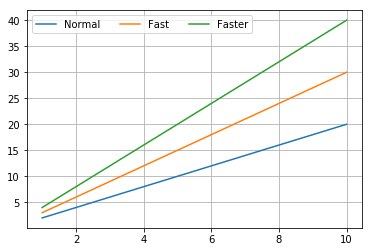

In [33]:
import matplotlib.pyplot as plt
import numpy as np
 
x = np.arange(1,11,1)
 
plt.plot(x,x*2, label='Normal')
plt.plot(x,x*3, label='Fast')
plt.plot(x,x*4, label='Faster')
#此时并不会显示图例，必须执行下面的函数
plt.legend(loc=0, ncol=3) 
#loc = 0 自适应，寻找最合适的， 
#loc = 1: right top 
#loc = 2: left top
#loc = 3: left bottom
#loc = 4: right bottom
#ncol 分3列显示
 
plt.grid(True)
 
plt.show()
